# Data preprocessing
We are going to go over the following techniques:
- Dealing with missing data
- Duplicit data
- Errors
- Data scaling

For the imputation exercise, we will use the **California housing** dataset. An another classic dataset for machine learning, it contains missing values, which is perfect for us now.

After that, for the **normalization** and **standardization** exercise, we will use the Iris dataset once again.

Let's jump right in...

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load different datasets for different tasks
# For imputation, we'll use the California housing dataset as it includes missing values
housing = datasets.fetch_california_housing()
housing_data = pd.DataFrame(housing.data, columns=housing.feature_names)

# For duplicates removal, we'll create a synthetic dataset
dup_data = {'A': [1, 2, 2, 3, 4, 4, 4], 'B': [5, 6, 6, 7, 8, 8, 8], 'C': [9, 10, 10, 11, 12, 12, 12]}
dup_df = pd.DataFrame(dup_data)

# For error correction, assume a simplistic case where negative values are errors
error_data = {'A': [1, -2, 3], 'B': [4, -5, 6]}
error_df = pd.DataFrame(error_data)

In [12]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
# the housing dataset from sklearn does not have any missing values

housing = pd.read_csv('./data/california_housing.csv')
housing = housing.drop(['ocean_proximity'], axis =1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Imputation, duplicates, and errors

There is really nothing to it, most of these are library functions in *pandas* or *scikit-learn*.

The notable exception is the imputation. Although most imputation techniques have already been implemented in *scikit-learn* and simply using them is easy, you still have to think carefully about what and why you'll use it. You also have the option of using your own imputers, be it custom functions for performing interpolation, to neural networks trained specifically for that task.

### imputation

In [17]:
# Imputation
print("Before Imputation:")
print(housing.isnull().sum())  # Check for missing values


Before Imputation:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [20]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [21]:
# Imputation
print("Before Imputation:")
print(housing.isnull().sum())  # Check for missing values

# Using mean imputation for simplicity
# This can get complicated real quickly if we use something more complicated.
imputer = SimpleImputer(strategy='mean')
housing_data_imputed = pd.DataFrame(imputer.fit_transform(housing), columns=housing.columns)

print("\nAfter Imputation:")
print(housing_data_imputed.isnull().sum())  # Check again for missing values

Before Imputation:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

After Imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


# removing duplicates

In [22]:

# Duplicates Removal
print("\nBefore Removing Duplicates:")
print(dup_df)

dup_df = dup_df.drop_duplicates()
print("\nAfter Removing Duplicates:")
print(dup_df)

# Correcting Errors
print("\nBefore Error Correction:")
print(error_df)

error_df[error_df < 0] = 0  # Correcting negative values by replacing them with 0
print("\nAfter Error Correction:")
print(error_df)


Before Removing Duplicates:
   A  B   C
0  1  5   9
1  2  6  10
2  2  6  10
3  3  7  11
4  4  8  12
5  4  8  12
6  4  8  12

After Removing Duplicates:
   A  B   C
0  1  5   9
1  2  6  10
3  3  7  11
4  4  8  12

Before Error Correction:
   A  B
0  1  4
1 -2 -5
2  3  6

After Error Correction:
   A  B
0  1  4
1  0  0
2  3  6


In [23]:
error_df.iloc[0,0]

1


Standardized Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

Normalized Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


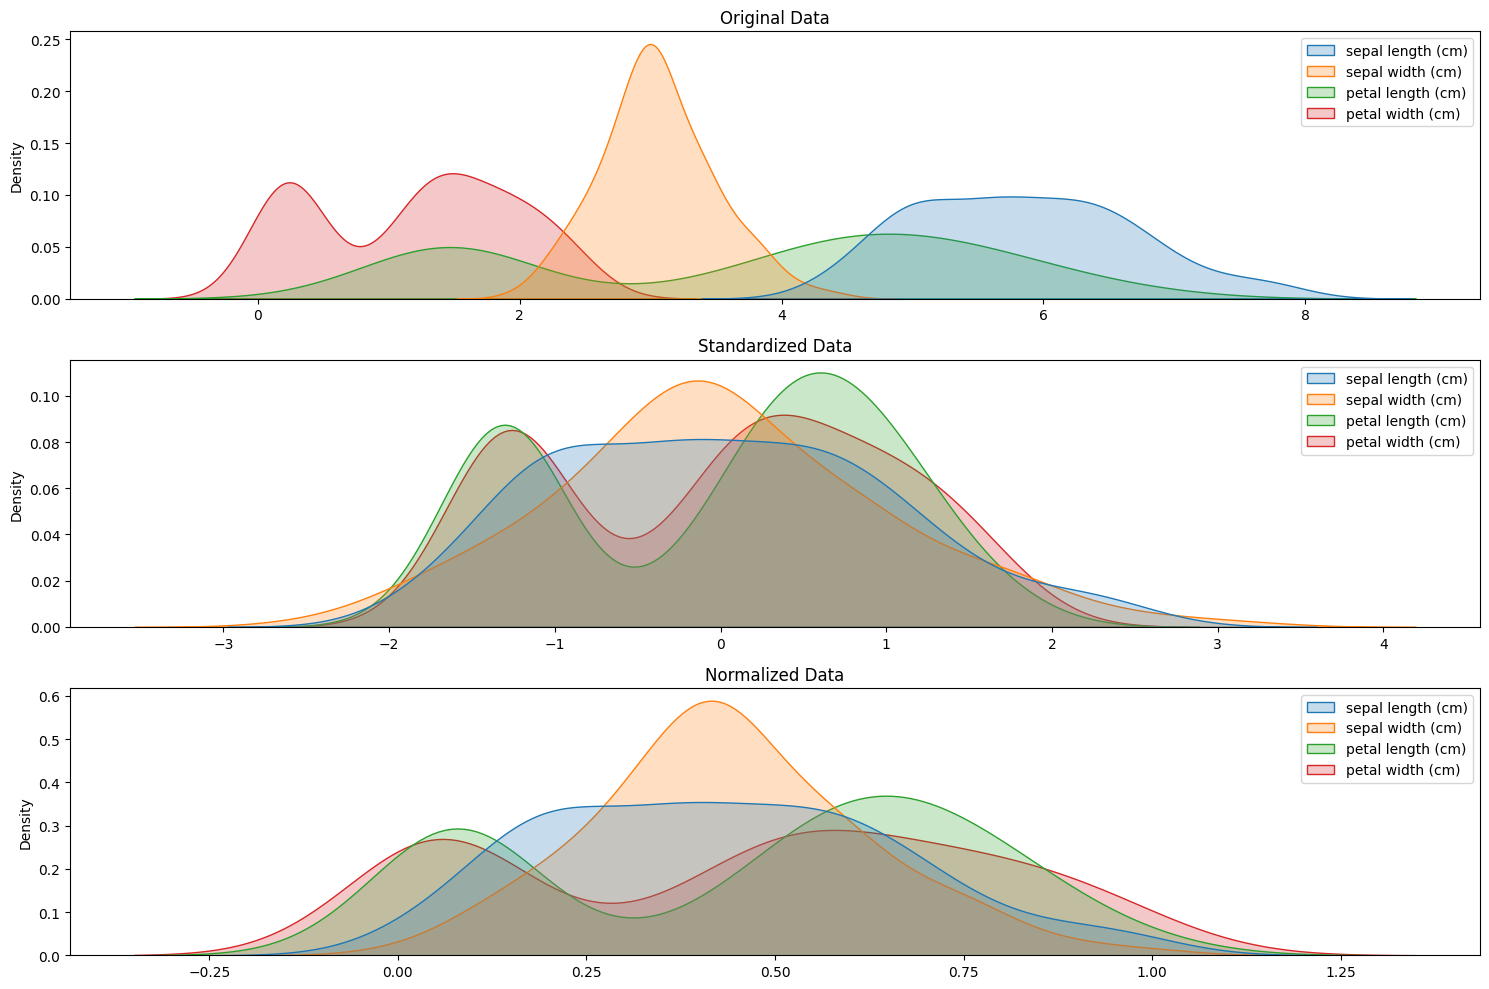

In [25]:
# For standardization and normalization, we'll use the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardization and Normalization
scaler = StandardScaler()
iris_standardized = pd.DataFrame(scaler.fit_transform(iris_df), columns=iris.feature_names)
print("\nStandardized Data:")
print(iris_standardized.head())

min_max_scaler = MinMaxScaler()
scaled_minmax = min_max_scaler.fit_transform(iris_df)
iris_normalized = pd.DataFrame(scaled_minmax, columns=iris.feature_names)
print("\nNormalized Data:")
print(iris_normalized.head())

# Plot original vs standardized vs normalized data for visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))

sns.kdeplot(data=iris_df, ax=ax1, fill=True)
ax1.set_title("Original Data")

sns.kdeplot(data=iris_standardized, ax=ax2, fill=True)
ax2.set_title("Standardized Data")

sns.kdeplot(data=iris_normalized, ax=ax3, fill=True)
ax3.set_title("Normalized Data")

plt.tight_layout()
plt.show()

# 5.1	3.5	1.4	0.2

## Question
- What is the difference between **Standardization** and **Normalization**? Can you illustrate the differences in the plots above?